# Bank Marketing Classification

In this part of the assignment we want to do a classification task using PyTorch on bank marketing dataset.

# Import Library

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from torch.utils.data import DataLoader, TensorDataset

# Load Dataset
Here, you should download and load the dataset. After that, you should split train dataset to train and validation sets. Finally, define the dataloaders for `train`, `validation` and `test`

In [10]:
#TODO

df = pd.read_csv('bank-full.csv', delimiter=';')
X = df.drop(columns=['y'])
y = df['y']

le = LabelEncoder()

X_encoded = pd.get_dummies(X, drop_first=True)
y_encoded = le.fit_transform(y)

X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training Set Shape:", X_train.shape, y_train.shape)
print("Validation Set Shape:", X_val.shape, y_val.shape)
print("Test Set Shape:", X_test.shape, y_test.shape)

Training Set Shape: (31647, 42) (31647,)
Validation Set Shape: (6782, 42) (6782,)
Test Set Shape: (6782, 42) (6782,)


# Normalize data
normalize numerical data.

In [11]:
# Normalize numerical data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Create Data Loader
create data loader for pytorch

In [13]:
#TODO

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Model
define your model in here

In [15]:
class BankMarketingNet(nn.Module):
    def __init__(self, input_dim, hidden_dim1=64, hidden_dim2=32):
        super(BankMarketingNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

    
input_dim = X_train_tensor.shape[1]
model = BankMarketingNet(input_dim)

# Train your model
Define `criterion` and `optimizer`.
Train your model

Tasks:
- [ ] Things that are needed to be printed in each epoch:
  - Number of epoch
  - Train loss
  - Validation loss
- [ ] save train/validation loss (of each epoch) in an array for later usage

In [16]:
#TODO

learning_rate = 0.001
num_epochs = 20
batch_size = 32

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


train_losses = []
val_losses = []

def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            labels = labels.unsqueeze(1).float()
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        val_loss = evaluate_model(model, criterion, val_loader)
        train_losses.append(epoch_loss)
        val_losses.append(val_loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Training loss: {epoch_loss:.4f}, Validation loss: {val_loss:.4f}")

def evaluate_model(model, criterion, val_loader):
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            labels = labels.unsqueeze(1).float()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)

    val_loss = running_loss / len(val_loader.dataset)
    return val_loss

train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs)

Epoch 1/20, Training loss: 0.2476, Validation loss: 0.2199
Epoch 2/20, Training loss: 0.2111, Validation loss: 0.2134
Epoch 3/20, Training loss: 0.2047, Validation loss: 0.2120
Epoch 4/20, Training loss: 0.2002, Validation loss: 0.2100
Epoch 5/20, Training loss: 0.1960, Validation loss: 0.2135
Epoch 6/20, Training loss: 0.1923, Validation loss: 0.2129
Epoch 7/20, Training loss: 0.1886, Validation loss: 0.2139
Epoch 8/20, Training loss: 0.1861, Validation loss: 0.2122
Epoch 9/20, Training loss: 0.1838, Validation loss: 0.2153
Epoch 10/20, Training loss: 0.1812, Validation loss: 0.2148
Epoch 11/20, Training loss: 0.1788, Validation loss: 0.2099
Epoch 12/20, Training loss: 0.1770, Validation loss: 0.2154
Epoch 13/20, Training loss: 0.1753, Validation loss: 0.2148
Epoch 14/20, Training loss: 0.1732, Validation loss: 0.2222
Epoch 15/20, Training loss: 0.1707, Validation loss: 0.2175
Epoch 16/20, Training loss: 0.1688, Validation loss: 0.2228
Epoch 17/20, Training loss: 0.1675, Validation lo

### Visualize Loss plot

Using the arrays that you have (from previous task in the above section), visualize Loss plot (train and validation together)

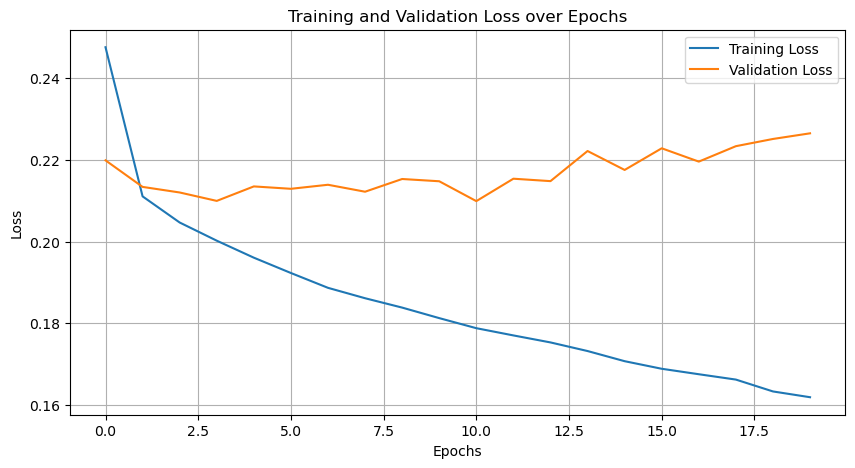

In [18]:
#TODO

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

## Evaluation

Test your trained model (using the Test Dataloader that you have).

In [17]:
#TODO
test_loss = evaluate_model(model, criterion, test_loader)
print(f"Test loss: {test_loss:.4f}")
print(f"Accuracy: {(1-test_loss):.4f}")

Test loss: 0.2209
Accuracy: 0.7791
